In [1]:
import pandas as pd
import scipy.stats as stats
from sklearn.neighbors.kde import KernelDensity

In [2]:
df = pd.read_csv('10702-mid-term.csv')

In [3]:
df.head()

,order,chi-comp,chi-reading,chi-conv,chi-overall,eng,math,soc,sci,total-grade
0,1,88.0,95.83,92.5,93.46,99.45,93.99,95.00,90.48,472.38
1,2,87.8,96.66,93.0,93.99,95.05,91.58,93.87,90.44,464.93
2,3,87.5,93.94,91.5,92.03,97.20,95.28,90.67,89.32,464.50
3,4,86.8,95.28,92.0,92.75,99.15,94.04,87.94,89.40,463.28
4,5,85.3,94.50,89.5,91.58,99.45,89.48,96.67,85.44,462.62


In [4]:
df.loc[[4,]]

,order,chi-comp,chi-reading,chi-conv,chi-overall,eng,math,soc,sci,total-grade
4,5,85.3,94.5,89.5,91.58,99.45,89.48,96.67,85.44,462.62


In [5]:
df_clean = df.loc[:,'chi-comp':'total-grade']
df_clean.describe()

,chi-comp,chi-reading,chi-conv,chi-overall,eng,math,soc,sci,total-grade
count,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,83.18250,86.612000,88.525000,85.996000,87.726250,87.057000,86.497000,80.520000,427.796250
std,2.78622,7.177659,3.526366,5.316417,10.725019,7.956263,6.849982,7.787081,32.376206
min,77.80000,69.810000,79.500000,73.510000,55.900000,56.110000,66.570000,60.120000,328.990000
25%,81.30000,81.285000,85.375000,81.780000,81.237500,86.045000,82.472500,76.770000,419.185000
50%,83.40000,87.480000,89.500000,86.670000,92.675000,89.415000,87.405000,81.500000,435.350000
75%,85.00000,92.850000,91.000000,90.477500,95.012500,91.505000,91.320000,85.520000,449.727500
max,88.50000,96.660000,94.000000,93.990000,99.450000,96.730000,96.670000,92.100000,472.380000


In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

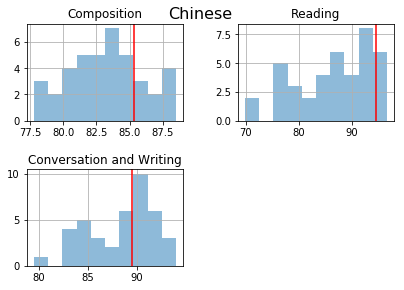

In [8]:
plt.figure()

plt.subplot(221)
plt.title('Composition')
df.loc[:,'chi-comp'].hist(alpha=0.5, bins=10)
plt.axvline(x=df.loc[4,'chi-comp'], color='r', linestyle='-')
plt.suptitle('Chinese', fontsize=16)

plt.subplot(222)
plt.title('Reading')
df.loc[:,'chi-reading'].hist(alpha=0.5, bins=10)
plt.axvline(x=df.loc[4,'chi-reading'], color='r', linestyle='-')

plt.subplot(223)
plt.title('Conversation and Writing')
df.loc[:,'chi-conv'].hist(alpha=0.5, bins=10)
plt.axvline(x=df.loc[4,'chi-conv'], color='r', linestyle='-')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)

In [9]:
df.loc[:,'chi-overall'].sort_values().values.reshape(-1, 1).shape

(40, 1)

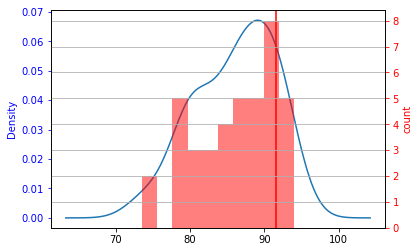

In [10]:
fig, ax1 = plt.subplots()
# pdf = stats.norm.pdf(df.loc[:,'chi-overall'].sort_values(), df.loc[:,'chi-overall'].mean(), df.loc[:,'chi-overall'].std())
# ax1.plot(df.loc[:,'chi-overall'].sort_values(), pdf, color = 'b')
# ax1.set_ylabel('normalized', color='b')
# ax1.tick_params('y', colors='b')
ax1.set_ylabel('normalized', color='b')
ax1.tick_params('y', colors='b')
df.loc[:,'chi-overall'].plot.kde()

ax2 = ax1.twinx()
ax2.set_ylabel('count', color='r')
ax2.tick_params('y', colors='r')
df.loc[:,'chi-overall'].hist(color='r', alpha=0.5, bins=10)
ax1.axvline(x=df.loc[4,'chi-overall'], color='r', linestyle='-')

highest grade: 93.99
lowest grade: 73.51
my grade: 91.58


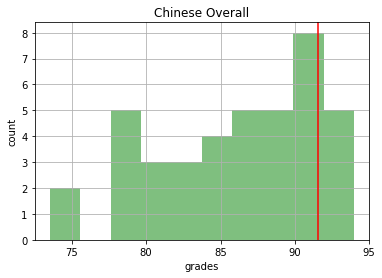

In [11]:
print('highest grade:', df.loc[:,'chi-overall'].max())
print('lowest grade:', df.loc[:,'chi-overall'].min())
print('my grade:', df.loc[4,'chi-overall'].min())

fig, ax1 = plt.subplots()
df.loc[:,'chi-overall'].hist(color='g', alpha=0.5, bins=10)
plt.title('Chinese Overall')
ax1.set_xlabel('grades')
ax1.set_ylabel('count')
ax1.axvline(x=df.loc[4,'chi-overall'], color='r', linestyle='-')

plt.show()

highest grade: 99.45
lowest grade: 55.9
my grade: 99.45


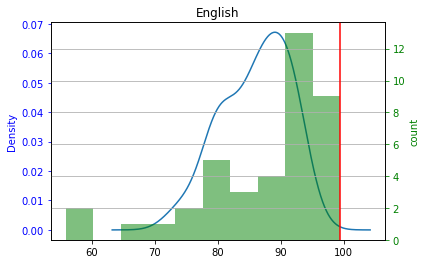

In [12]:
print('highest grade:', df.loc[:,'eng'].max())
print('lowest grade:', df.loc[:,'eng'].min())
print('my grade:', df.loc[4,'eng'].min())

fig, ax1 = plt.subplots()

ax1.set_ylabel('normalized', color='b')
ax1.tick_params('y', colors='b')
df.loc[:,'chi-overall'].plot.kde()

ax2 = ax1.twinx()
df.loc[:,'eng'].hist(alpha=0.5, bins=10, color='g')
plt.title('English')
ax2.set_xlabel('grades')
ax2.tick_params('y', colors='g')
ax2.set_ylabel('count', color='g')
plt.axvline(x=df.loc[4,'eng'], color='r', linestyle='-')
plt.show()

highest grade: 96.73
lowest grade: 56.11
my grade: 89.48


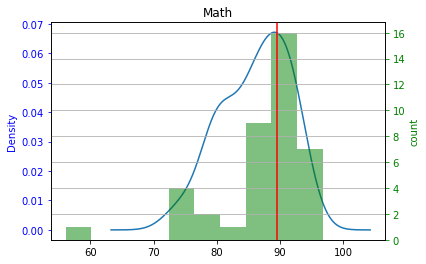

In [13]:
print('highest grade:', df.loc[:,'math'].max())
print('lowest grade:', df.loc[:,'math'].min())
print('my grade:', df.loc[4,'math'].min())

fig, ax1 = plt.subplots()

ax1.set_ylabel('normalized', color='b')
ax1.tick_params('y', colors='b')
df.loc[:,'chi-overall'].plot.kde()

ax2 = ax1.twinx()
df.loc[:,'math'].hist(alpha=0.5, bins=10, color='g')
plt.title('Math')
ax2.set_xlabel('grades')
ax2.tick_params('y', colors='g')
ax2.set_ylabel('count', color='g')
plt.axvline(x=df.loc[4,'math'], color='r', linestyle='-')
plt.show()

highest grade: 96.67
lowest grade: 66.57
my grade: 96.67


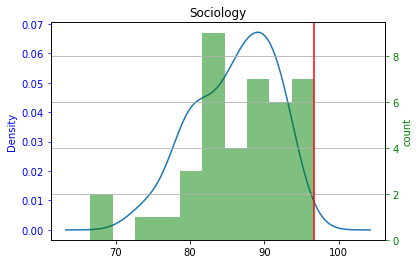

In [14]:
print('highest grade:', df.loc[:,'soc'].max())
print('lowest grade:', df.loc[:,'soc'].min())
print('my grade:', df.loc[4,'soc'].min())

fig, ax1 = plt.subplots()

ax1.set_ylabel('normalized', color='b')
ax1.tick_params('y', colors='b')
df.loc[:,'chi-overall'].plot.kde()

ax2 = ax1.twinx()
plt.title('Sociology')
df.loc[:,'soc'].hist(alpha=0.5, bins=10, color='g')
ax2.set_xlabel('grades')
ax2.tick_params('y', colors='g')
ax2.set_ylabel('count', color='g')
plt.axvline(x=df.loc[4,'soc'], color='r', linestyle='-')
plt.show()

highest grade: 92.1
lowest grade: 60.12
my grade: 85.44


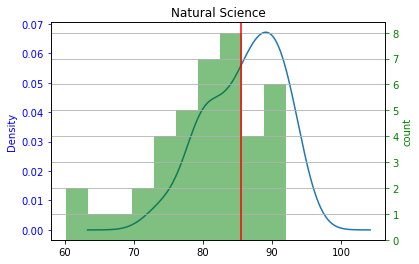

In [15]:
print('highest grade:', df.loc[:,'sci'].max())
print('lowest grade:', df.loc[:,'sci'].min())
print('my grade:', df.loc[4,'sci'].min())

fig, ax1 = plt.subplots()

ax1.set_ylabel('normalized', color='b')
ax1.tick_params('y', colors='b')
df.loc[:,'chi-overall'].plot.kde()

ax2 = ax1.twinx()
df.loc[:,'sci'].hist(alpha=0.5, bins=10, color='g')
plt.title('Natural Science')
ax2.set_xlabel('grades')
ax2.tick_params('y', colors='g')
ax2.set_ylabel('count', color='g')
plt.axvline(x=df.loc[4,'sci'], color='r', linestyle='-')
plt.show()

In [16]:
df_clean.rank(axis=0, ascending=False)

,chi-comp,chi-reading,chi-conv,chi-overall,eng,math,soc,sci,total-grade
0,2.0,2.0,4.0,2.0,1.5,5.0,2.0,2.0,1.0
1,3.0,1.0,2.5,1.0,10.0,10.0,6.0,3.0,2.0
2,4.0,7.0,8.5,5.0,4.0,2.0,13.0,6.0,3.0
3,5.0,4.0,6.0,4.0,3.0,4.0,20.0,5.0,4.0
4,8.5,5.0,21.0,6.0,1.5,20.0,1.0,11.5,5.0
5,15.5,10.0,12.0,11.0,6.0,16.0,4.0,20.0,6.0
6,6.0,12.0,28.5,12.0,19.0,8.0,5.0,16.0,7.0
7,11.0,13.0,15.5,13.0,14.0,15.0,10.0,8.0,8.0
8,19.0,6.0,8.5,7.0,29.0,21.0,3.0,1.0,9.0
9,36.0,14.0,21.0,15.5,17.0,18.0,7.0,14.0,10.0
